<a href="https://colab.research.google.com/github/Camty1/wolfe_ENGS_108_assignment_2/blob/main/Wolfe_assignment_2_Fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2023 Assignment 2**

*Due TBD at 11:59PM on Github*

**Instructors:** George Cybenko

**TAs:** Ganesh Rohit Nirogi, Diksha Bubna, Sunishka Jain, Kushagra Rawat


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [39]:
''' Import Statements '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import sklearn
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from scipy import signal
import matplotlib.collections as collections

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Loading**
Upload the red and synthetic datasets to your google colab session using Google Drive. Read the following [tutorial](https://github.com/Thayer-ENGS108/Assignment_2_Fall2022) for how to get setup.

In [40]:
#TODO: Set your base datasets path. This is my base path, you will need to change to match yours.
dataset_base_path = '/content/drive/MyDrive/datasets'

In [41]:
#-- Everything else you should not need to change.
import os
import pickle

#-- Gather paths
synth_data_path = os.path.join(dataset_base_path, 'assign_2_synth_data.pk')
red_train_path = os.path.join(dataset_base_path, 'red_train.csv')
red_valid_path = os.path.join(dataset_base_path, 'red_valid.csv')
red_test_path = os.path.join(dataset_base_path, 'red_test.csv')
synth_train_path = os.path.join(dataset_base_path, 'synth_train.csv')
synth_valid_path = os.path.join(dataset_base_path, 'synth_valid.csv')
synth_test_path = os.path.join(dataset_base_path, 'synth_test.csv')

#-- Load Synth_Data
with open(synth_data_path, 'rb') as f_:
    synth_data = pickle.load(f_)

#-- Load Red Wine Data
red_train_df = pd.read_csv(red_train_path)
red_valid_df = pd.read_csv(red_valid_path)
red_test_df = pd.read_csv(red_test_path)
synth_train_df = pd.read_csv(synth_train_path)
synth_valid_df = pd.read_csv(synth_valid_path)
synth_test_df = pd.read_csv(synth_test_path)

#-- Data is stored in a tuple of format (X, y) and are already converted to numpy arrays.
red_train = (red_train_df.drop('quality', axis=1).to_numpy(), red_train_df['quality'].to_numpy())
red_valid = (red_valid_df.drop('quality', axis=1).to_numpy(), red_valid_df['quality'].to_numpy())
red_test = (red_test_df.drop('quality', axis=1).to_numpy(), red_test_df['quality'].to_numpy())

#-- Load in Synth train, valid, test data with tuple format (X, y)
synth_train = (synth_train_df.drop('y', axis=1).to_numpy(), synth_train_df['y'].to_numpy())
synth_valid = (synth_valid_df.drop('y', axis=1).to_numpy(), synth_valid_df['y'].to_numpy())
synth_test = (synth_test_df.drop('y', axis=1).to_numpy(), synth_test_df['y'].to_numpy())

## **Problem 1: $K$-Means Clustering**
In this problem, you will solve a clustering
task using the k-means algorithm and an associated classification task using $k$ nearest neighbors algorithm, both of which you learned in class. The dataset for this problem is a synthetic two-dimensional dataset *synth_data*. Each entry has two features $(x_1, x_2)$.
>
> **Part 1** A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following:
>> **(a)** Choose a suitable type of plot and visualize the training data.

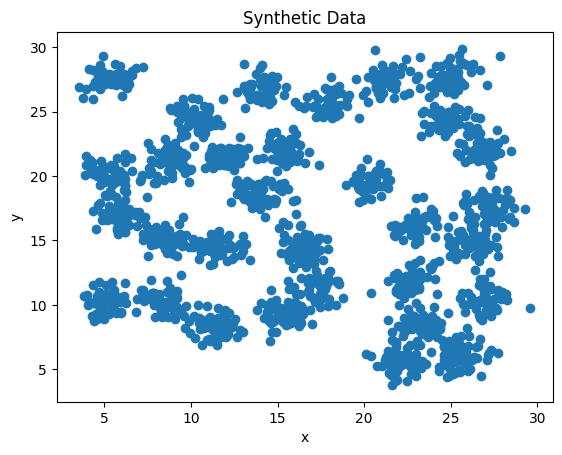

In [42]:
plt.scatter(synth_train[0][:,0], synth_train[0][:,1])
plt.title("Synthetic Data");
plt.xlabel("x");
plt.ylabel("y");

>> **(b)** From your plot, how many clusters, $k$, would you estimate are represented in the dataset?

From counting the clusters above, there appear to be around 30



> **Part 2** Build a model.
>> **(a)** Using the k-Means algorithm, implement a clustering model. *Hint: Use [scikit-learn's K-means library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).*

In [43]:
k_means_model = KMeans(n_clusters=30)

>> **(b)** Train the clustering model on several reasonable values of $k$, taking into account your visual inspection from 1b. Plot the sum of distance (SSE) from each data point and its respective cluster for 10 different values of $k$.

In [44]:
def train(k, dataset):
    ''' Using your model above, implement a function that will train your K-means
    for different values of k on your dataset and return the trained model'''
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(dataset)
    return model

In [45]:
def calculateSSE(model):
    ''' Using a trained model calculate the SSE for the model '''
    sse = model.inertia_

    return sse

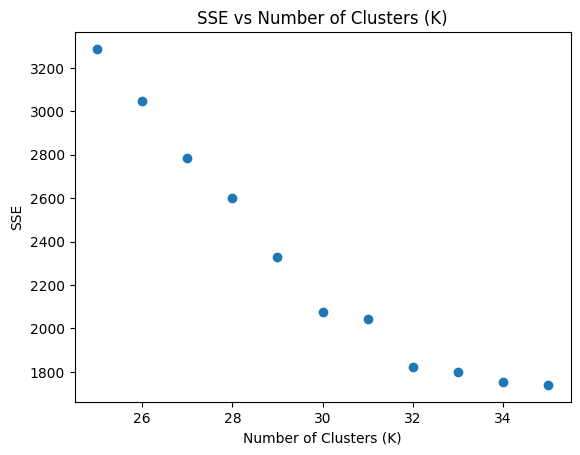

In [46]:
k = np.array(list(range(25, 36)))
sse = np.zeros(k.size)

for i in range(len(k)):
  model = train(k[i], synth_train[0])
  sse[i] = calculateSSE(model)

plt.scatter(k,sse);
plt.title("SSE vs Number of Clusters (K)");
plt.xlabel("Number of Clusters (K)");
plt.ylabel("SSE");


>> **(c)** What value of $k$ is optimal? How does it compare to your visual inspection?


The optimal value seems to be 31, as after 31, increasing the number of points only has marginal benefit to the accuracy of the model.  This leads me to believe that the model is overfitting after this point, as all of the true clusters in the data have been found.



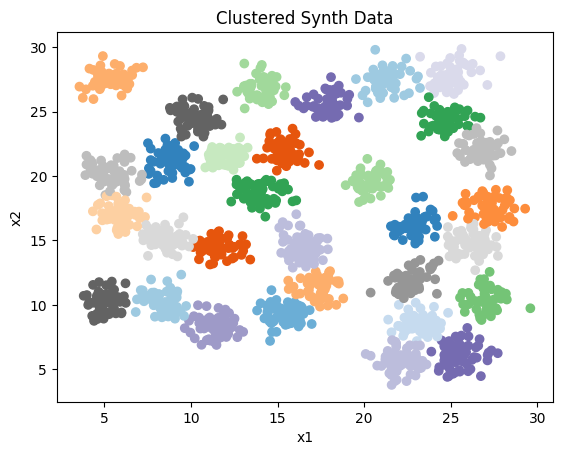

In [47]:
optimal_model = train(31, synth_train[0])

plt.scatter(synth_train[0][:,0], synth_train[0][:,1], c=optimal_model.labels_, cmap='tab20c')
plt.title("Clustered Synth Data");
plt.xlabel("x1");
plt.ylabel("x2");

# **Problem 2: $k$-NN Classification**
In this problem, you will utilize data deriving
from the same synthetic dataset as above. This time, the data has been separated into *synth_train*, *synth_valid* and *synth_test* arrays. Furthermore, each sample now includes a class label found in the $y$ column. These class labels come from the set $\{1, 2, . . . , 31\}$. *Note: These are not the same datasets as Problem 1.*

> **Part 1** Train an implementation of the $k$-Nearest Neighbors algorithm on the training dataset. Note that $k$ here refers to the number of neighbors, not clusters.

In [48]:
def train(k, dataset):
    ''' Implement a function that will train a k-NN
    for different values of k on your dataset and return the trained model'''
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(dataset[0], dataset[1])
    return model

> **Part 2** Report the classification accuracy of this model on the validation set for different values for $k$. Plot these accuracies against $k$ and report the optimal value for $k$.

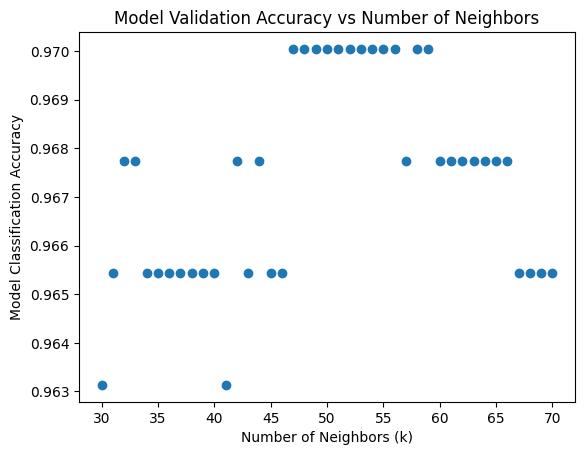

In [49]:
def get_validation_accuracy(model, validation_set):
  x = validation_set[0]
  y = validation_set[1]

  model_out = model.predict(x)

  n = len(y)
  correct = 0.0

  for i in range(n):
      if model_out[i] == y[i]:
          correct += 1.0

  return correct/n

k = np.array(list(range(30,71, 1)))
accuracy = np.zeros(k.size)

boop = synth_valid[0][1,:]

for i in range(len(k)):
    model = train(k[i], synth_train)
    accuracy[i] = get_validation_accuracy(model, synth_valid)

plt.scatter(k, accuracy);
plt.title("Model Validation Accuracy vs Number of Neighbors");
plt.xlabel("Number of Neighbors (k)");
plt.ylabel("Model Classification Accuracy");

The optimal value appears to be 50

> **Part 3** Report the classification precision, recall and F1-score of this model on the data in synth test.csv using the optimal value of $k$ that you found in Part 2.

In [50]:
optimal_model = train(50, synth_train)
synth_test_pred = optimal_model.predict(synth_test[0])

print(classification_report(synth_test[1], synth_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.96      0.96      0.96        27
           3       0.97      0.97      0.97        36
           4       0.95      0.95      0.95        40
           5       0.97      0.90      0.93        31
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        36
           8       0.94      0.85      0.89        20
           9       1.00      1.00      1.00        28
          10       0.93      0.97      0.95        29
          11       1.00      1.00      1.00        29
          12       0.91      0.97      0.94        32
          13       0.96      0.96      0.96        26
          14       0.95      1.00      0.98        20
          15       0.97      1.00      0.99        34
          16       1.00      1.00      1.00        30
          17       1.00      1.00      1.00        35
          18       0.97    

# **Problem 3: Decision Tree Classification**
In this problem you will use decision
trees to classify the quality of red vinho verde wine samples based on their physicochemical properties. The dataset has been separated into *red_train, red_valid and red_test* arrays. For all of these files, the rightmost column (“quality”) is the target label for each datapoint. All other columns are features.

> **Part 1** First let’s explore the datasets through the following exercises. Note that we cannot plot the data in a meaningful way given that number of features exceed the physical dimensions.

>> **(a)** How many datapoints are in the training, validation, and testing sets?

In [51]:
training_shape = red_train[0].shape
validation_shape = red_valid[0].shape
testing_shape = red_test[0].shape

print("Training datapoints:", training_shape[0])
print("Validation datapoints:", validation_shape[0])
print("Testing datapoints:", testing_shape[0])

Training datapoints: 895
Validation datapoints: 224
Testing datapoints: 480


>> **(b)** How many features are available for each datapoint?

In [52]:
print("Features:", training_shape[1])

Features: 11


>> **(c)** What are the average *alcohol* and *pH* values for *training* samples?

In [53]:
print("Average alcohol content:", str(np.mean(red_train[0][10]))+"%")
print("Average pH", str(np.mean(red_train[0][8])))

Average alcohol content: 9.9353%
Average pH 5.738363636363636


> **Part 2** Decision Trees.

>> **(a)** Implement a binary decision tree model for the training data. *Hint: Try looking at the [scikit-learn decision tree library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).*

In [54]:
def train(dataset, max_depth=None):
    ''' Implement a function that will train a decision tree model
    on your dataset and return the trained model'''
    x = dataset[0]
    y = dataset[1]
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(x,y)
    return model

>> **(b)** There are a number of hyperparameters that can be tuned to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are *maximum depth* of the tree or *minimum number of samples* left. Tune the *maximum depth* of the tree by reporting the accuracy of the classifier in 2a on the validation set for different settings of *maximum depth*. Plot your findings.

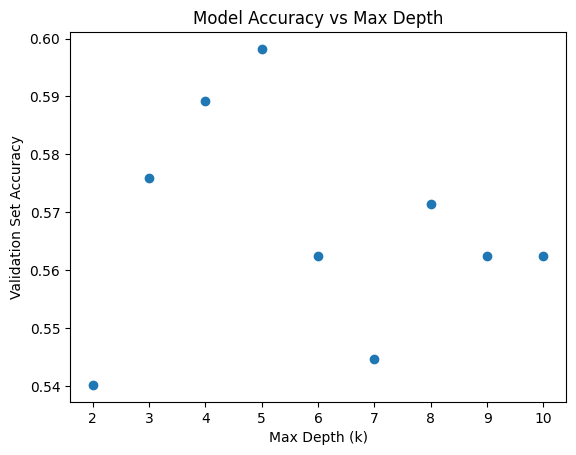

In [55]:
depths = np.array(list(range(2,11)))
accuracy = np.zeros(depths.shape)

for i in range(len(depths)):
    model = train(red_train, depths[i])
    accuracy[i] = get_validation_accuracy(model, red_valid)

plt.scatter(depths, accuracy);
plt.title("Model Accuracy vs Max Depth");
plt.xlabel("Max Depth (k)");
plt.ylabel("Validation Set Accuracy");

>> **(c)** Use the optimum setting of *maximum depth* found in 2b to report the accuracy of the classifier on the *test* dataset.

In [56]:
optimal_depth = 5

optimal_model = train(red_train, optimal_depth)
red_test_pred = optimal_model.predict(red_test[0])

n = len(red_test[1])
correct = 0.0
for i in range(n):
    if red_test[1][i] == red_test_pred[i]:
        correct += 1.0

accuracy = correct/n

print("Model Accuracy:", str(accuracy))

Model Accuracy: 0.5666666666666667


# **Problem 4: Systems - Estimating ODE Parameters**

Many real-world systems can be modelled by linear diffferential equations. Some of the most common examples are mechanical and electrical oscillations (see mass-spring example below) which can be described by the solution of an initial value problem of the form:

$$𝑎𝑥″+𝑏𝑥′+𝑐𝑥=𝑔(𝑡)  \tag{1}$$    

, where initial condition are given by:       $𝑥(0)=𝑥0$,   $𝑥′(0)=𝑥′0$                    

For our problems, we will assume that $g(t) = 0$, no external force (for spring system etc)

![Url](https://benmoseley.blog/wp-content/uploads/2021/08/oscillator.gif)


>**Part 1** Lets generate some synthetic data using an ODE for a vibration with no damping in chapter 3.7 Example 4 (Source: Elementary Differential Equations and Boundary Value Problems by Boyce & DiPrima, Wiley 2017).
In this system, $$ x'' + 0.125x' + x= 0 \tag{2}$$
and the analytical solution is the function below:


In [57]:
t = np.linspace(0, 30*np.pi, 1000)   # time
x_funct = lambda t: (32/np.sqrt(255))*np.exp(-1*t/16)*np.cos((np.sqrt(255)/16)*t -0.06254)  # function to get x given t

# analytic function x given t
x_analytic = x_funct(t)

>> **(a)** Now lets assume we have observed a noisy sample composed of the first 20% of x_analytic. Create noisy data for the first 20% of x_analytic

In [58]:
# create t_noisy (time) to record time for the first 20% of t
NOISY_FACTOR = 5 # controls the threshold for adding noise

len_t = int(0.2*len(t))
t_noisy = t[:len_t]

In [59]:
# TODO: Compute x for the corresponding t_noisy
x = x_funct(t_noisy)

In [60]:
# TODO: adding noise
noise = np.array(np.random.random(len_t) - 0.5)/NOISY_FACTOR
x_noisy = x + noise

>>**(b)** Our task in this question is to estimate parameters a, b, and c, assuming that we only observed x_noisy

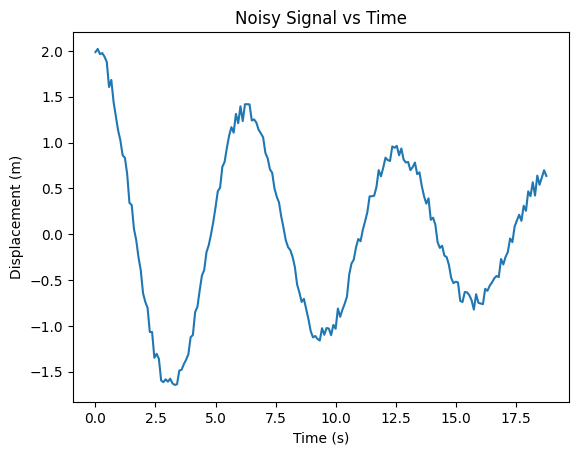

In [61]:
# TODO: Plot the observed noisy data below (time vs displacement)
plt.plot(t_noisy, x_noisy, label="Noisy Signal");
#plt.plot(t_noisy, x_funct(t_noisy), label="True Signal");
#plt.legend();
plt.title("Noisy Signal vs Time");
plt.xlabel("Time (s)");
plt.ylabel("Displacement (m)");

>> **(c)** Real-world data is often noisy and denoising can help to reduce the noise. Denoise the above data to create x_denoised:

In [62]:
# denoising
N, Wn = 5, 0.07   # Feel free to modify N and Wn as you see fit!
b, a = signal.butter(N, Wn, analog=False)   # module from scipy
x_denoised = signal.filtfilt(b,a,x_noisy)

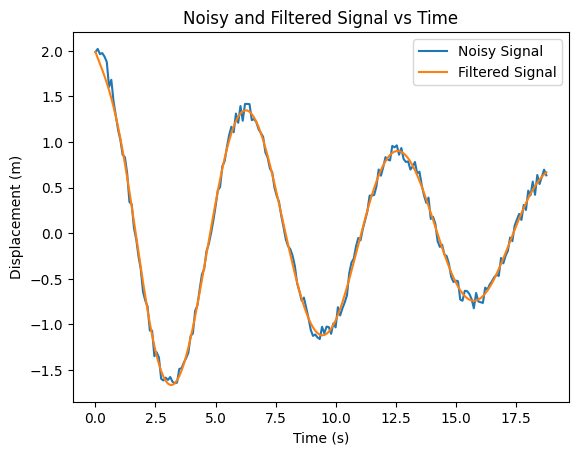

In [63]:
# TODO: Plot and insert legend to differentiate x_noisy and x_denoised vs time (on same plot)
plt.plot(t_noisy, x_noisy, label="Noisy Signal");
plt.plot(t_noisy, x_denoised, label="Filtered Signal");
plt.legend();
plt.title("Noisy and Filtered Signal vs Time");
plt.xlabel("Time (s)");
plt.ylabel("Displacement (m)");

**Part 2**: Compute derivatives x' and x'' to estimate a, b, and c given x

>>**a** Using the ([forward method (finite difference)](https://en.wikipedia.org/wiki/Finite_difference)).
compute $x'$ and $x''$ for both x_noisy and x_denoised

In [64]:
#TODO: Complete the function below
def first_derivative(X, dt):
    first_derivative = (X[1:]-X[:-1])/dt;

    return first_derivative

In [65]:
#TODO: Complete the functions below
def second_derivative(x_first, dt):
    # Basically differentiate the first derivative
    second_derivative = (x_first[1:] - x_first[:-1])/dt;
    return second_derivative

In [66]:
def get_derivatives (X):
    dt = t[1] - t[0] # time difference
    X_prime =  first_derivative(deepcopy(X), dt)
    X_prime_squared = second_derivative(deepcopy(X_prime), dt)
    # adjust to make equal lengths arrays
    return X[2:], X_prime[1:], X_prime_squared


# for noisy data
x, x_prime, x_prime_squared = get_derivatives(x_noisy)

# for denoised data
x1, x_prime1, x_prime_squared1 = get_derivatives(x_denoised)

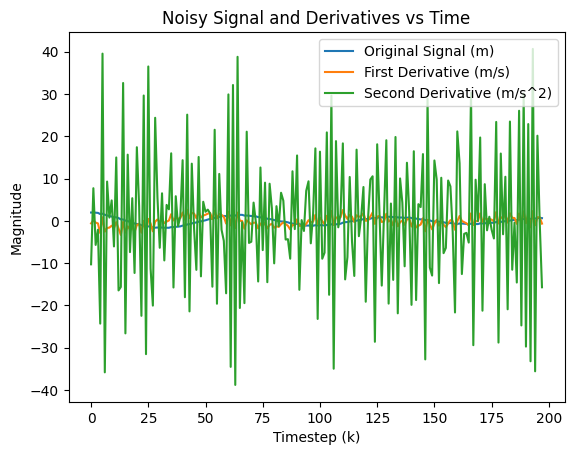

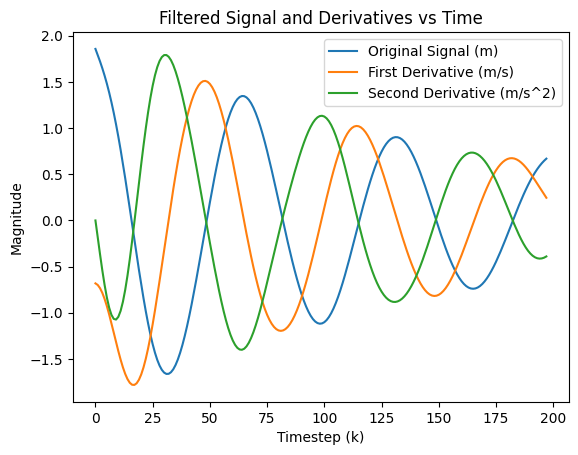

In [67]:
# TO DO: Fill the function belwo

def plot_figs (x, x_first, x_second):
    #TODO: On same graph, plot x, x', x''
    plt.figure();
    plt.plot(x, label="Original Signal (m)");
    plt.plot(x_first, label="First Derivative (m/s)");
    plt.plot(x_second, label="Second Derivative (m/s^2)");
    plt.legend();
    plt.title("Signal and Derivatives vs Time");
    plt.xlabel("Timestep (k)");
    plt.ylabel("Magnitude")
    return;

plot_figs(x, x_prime, x_prime_squared)
plt.title("Noisy Signal and Derivatives vs Time");
plot_figs(x1, x_prime1, x_prime_squared1)
plt.title("Filtered Signal and Derivatives vs Time");

>>**(b)** How do the derivative plots compare for the noisy vs the denoised samples? Whats the effect of denoising? What happens when we adjust the NOISY_FACTOR (see Part 1a)?

Taking a finite difference of a noisy signal compounds the noise, meaning that the derivatives of our noisy signal are incredibly noisy, and not that accurate.  However, by first running the signal through a low pass filter, we are able to remove much of that noise.  This allows us to extract the true signal from the noise, and produce more accurate estimates of $\dot{x}$ and $\ddot{x}$.  Adjusting NOISY_FACTOR changes the magnitude of the noise.  By increasing NOISY_FACTOR, the standard deviation of the noise decreases.

>>**(c)** Now we have x, x' and x''. Since g(t) = 0; we can estimate a, b, and c via regression. If we assume c = 1,
then Equation 1 can be written as:
    
    
$$𝑎𝑥″+𝑏𝑥′ =  -x \tag{3}$$


>>>From Equation 3, we can perform [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to estimate parameters a and b. Using -x as your dependent variable, and x' and x'' as your independent variables. Train a regression model below:




In [68]:
#TODO: Fill the function below

def train_model (X, X_first, X_second):
    """ X - original x, X_first - first derivative, X_second - second derivative """
    X_first = X_first.reshape(len(X_first),1);
    X_second = X_second.reshape(len(X_second),1);
    x_fit = np.concatenate([X_second, X_first], axis=1);
    y_fit = -X;

    model = LinearRegression();
    model.fit(x_fit, y_fit);

    return model.coef_

# train regression models for the noisy and denoised data
coeff_noisy  = train_model(x, x_prime, x_prime_squared)   # noisy data
coeff_denoised = train_model(x1, x_prime1, x_prime_squared1)   # denoised data

**Part 3**  From the model coefficients, we can identify parameters $a$ and $b$ and we know that $c = 1$. Now, our task is to
predict how good our model can predict the entire dataset.

In [69]:
a_noisy, b_noisy = coeff_noisy
a_denoised, b_denoised = coeff_denoised

print('For the noisy sample: (a = {}, b = {}, c = 1)'.format(a_noisy, b_noisy))
print('For the denoised sample: (a = {}, b = {}, c = 1)'.format(a_denoised, b_denoised))
print("The analytic solution has (a = 1, b = 0.125, and c = 1)")


For the noisy sample: (a = 0.0010315330107163242, b = 0.00704886716330394, c = 1)
For the denoised sample: (a = 1.0021507584198246, b = 0.03550965728210161, c = 1)
The analytic solution has (a = 1, b = 0.125, and c = 1)


>>**(a)** How do estimated parameters from the noisy and denoised samples compare to the analytic parameters?

In the noisy sample, the coefficients are very far from matching the true signal.  However, the filtered coefficients, especially the second derivative's coeffiecient, is practically a perfect match.  the first derivative coefficient is not as good of a match, however

>> **(b)** From Equation 3, $$x = -1*(ax'' + bx') \tag{4}$$
We will use this equation to test how good our parameters predict the analytic solution (given x' and x'').

In [70]:
# get derivatives on entire dataset
X, X_prime, X_prime_squared = get_derivatives(x_analytic)


# TODO: Use Equation 3 to compute X
def compute_x (X_first, X_second, a, b):
    X = -(a*X_second + b*X_first);
    # Fill here
    return X

# TODO: Predict Y for the noisy sample, and the denoised sample
x_pred_noisy = compute_x(X_prime, X_prime_squared, a_noisy, b_noisy)
x_pred_denoised  = compute_x(X_prime, X_prime_squared, a_denoised, b_denoised)



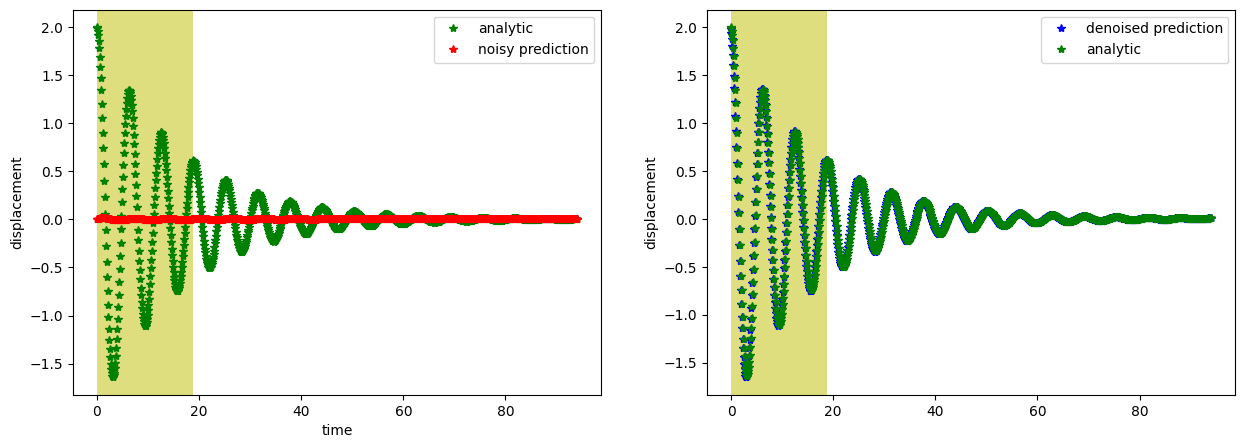

In [71]:

# adjust t to fit dimensions of predictions
LEN_T = len(t)
t_original = t[:LEN_T-2]
x_original = x_analytic[:LEN_T -2]


# Plots to show how well our parameters fit the data from the analytic solution
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
axes[0].plot(t_original, x_original, '*', color = 'green', label = 'analytic')
axes[0].plot(t_original, x_pred_noisy, '*', color = 'red', label = 'noisy prediction')

axes[1].plot(t_original, x_pred_denoised, '*', color = 'blue', label = 'denoised prediction')
axes[1].plot(t_original, x_original, '*', color = 'green', label = 'analytic')

axes[0].legend()
axes[1].legend()

# This shades the seen part (in creating the model -yellow), but the model
# extends to the unseen white part
axes[0].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)
axes[1].axvspan(0, t[len_t], color='y', alpha=0.5, lw=0)

axes[0].set_xlabel('time');
axes[0].set_ylabel('displacement');
axes[1].set_ylabel('time');
axes[1].set_ylabel('displacement');


>>**(c)** How do these two plots compare? On the same graph, plot the relative errors to compare how x_pred noisy and x_pred_denoised differ from x_original (if necessary, use a logarithmic scale). $$ RE(true, pred) =|true -pred|/|true|$$ What conclusion do you get from the relative errors?

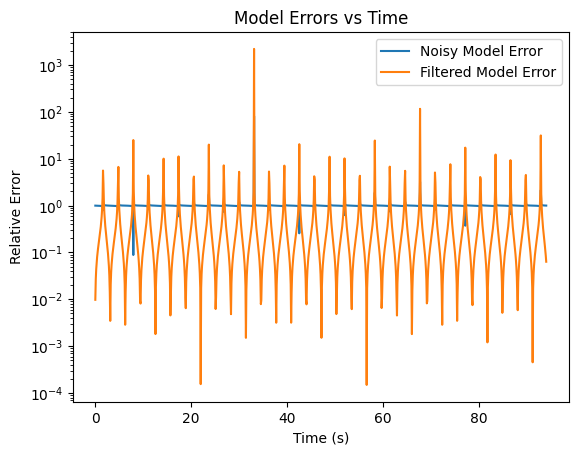

In [72]:
relative_error_noisy = np.absolute((x_pred_noisy - x_original)/x_original);
relative_error_filtered = np.absolute((x_pred_denoised - x_original)/x_original);
# relative_error_noisy = x_pred_noisy - x_original;
# relative_error_filtered = x_pred_denoised - x_original;

plt.semilogy(t_original, relative_error_noisy, label="Noisy Model Error");
plt.semilogy(t_original, relative_error_filtered, label="Filtered Model Error");
plt.legend();
plt.title("Model Errors vs Time");
plt.xlabel("Time (s)");
plt.ylabel("Relative Error");

Although the filtered error is sometimes above that of the noisy signal model, that is only when the true signal $\approx$ 0 and thus any slight deviation from truth will be greatly magnified.  The noisy model predicts that the signal will be around 0 the whole time (see part b) therefore for these points where the true signal is close to 0, it is more accurate, but overall the filtered model performs significantly better.  We know this is what is happenening because the spikes in the filtered error occur at regular intervals.

>>**(d)** In real-world scenarios, we often dont have x_analytic but only the noisy sample. How would you ensure if
the parameters you obtained are good enough if you only have x_noisy?

Collect a separate set of data and compare the output of your model vs the measurements.  Since you are using different data this time, you can ensure that you are not overfitting, and actually have a model with predictive capabilities.